In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools
from scipy.spatial import distance
%matplotlib inline

In [2]:
def unit_vector(A,B):
    # Calculate the unit vector from A to B 

    dist = distance.euclidean(A,B)

    return ((B[0]-A[0])/dist,(B[1]-A[1])/dist)

def calc_force(l, myosin,b):

    return 10*(l-1) + b*myosin

def d_pos(position,force,dt):

    x_new = position[0] + (dt/const.eta)*force[0]

    y_new = position[1] + (dt/const.eta)*force[1]

    return (x_new,y_new)

def CellArea(corners):
    n = len(corners) # of corners
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += corners[i][0] * corners[j][1]
        area -= corners[j][0] * corners[i][1]
    area = abs(area) / 2.0
    return area


In [ ]:
G = nx.Graph()

r = 7.6
n = 9

# Left most cell set up
origin = (0.0,0.0)
p0 = (r,0.0)
p1 = (r*np.cos(np.pi/3),r*np.sin(np.pi/3))
p2 = (r*np.cos(2*np.pi/3),r*np.sin(2*np.pi/3))
p3 = (r*np.cos(3*np.pi/3),r*np.sin(3*np.pi/3))
p4 = (r*np.cos(4*np.pi/3),r*np.sin(4*np.pi/3))
p5 = (r*np.cos(5*np.pi/3),r*np.sin(5*np.pi/3))
nodes = [p0,p1,p2,p3,p4,p5]

i = 0
G.add_node(i,pos=origin, center=True, phase_angle=0, boundary=[1,2,3,4,5,6])
i += 1 
for node in nodes:
    G.add_node(i,pos=node,center=False)
    i += 1
    
# Middle Top Cell with Cap
origin = 1.5*r, r*np.cos(np.pi/6)
p1 = (origin[0] + r*np.cos(np.pi/3), origin[1] +r* np.sin(np.pi/3))
p2 = (origin[0] + r*np.cos(2*np.pi/3), origin[1] + r*np.sin(2*np.pi/3))
    
nodes = [p1,p2]
    
G.add_node(i,pos=origin,center=True, phase_angle = 10000, boundary=[16,8,9,2,1,17])
i +=1
    
for node in nodes:
    G.add_node(i,pos=node,center=False)
    i += 1
    
# Middle Bottom Cell with Cap
origin = 1.5*r, -r*np.cos(np.pi/6)
p4 = (origin[0] + r*np.cos(4*np.pi/3), origin[1] + r*np.sin(4*np.pi/3))
p5 = (origin[0] + r*np.cos(5*np.pi/3), origin[1] + r*np.sin(5*np.pi/3))
nodes = [p4,p5]
    
G.add_node(i,pos=origin,center=True,phase_angle = 10000, boundary=[18,17,1,6,11,12])
i+=1
    
for node in nodes:
    G.add_node(i,pos=node,center=False)
    i += 1
    
# Right most cell
origin = 1.5*2*r, 0
p0 = (origin[0] + r, origin[1] + 0)
p1 = (origin[0] + r*np.cos(np.pi/3), origin[1] + r*np.sin(np.pi/3))
p2 = (origin[0] + r*np.cos(2*np.pi/3), origin[1] + r*np.sin(2*np.pi/3))
p3 = (origin[0] + r*np.cos(3*np.pi/3), origin[1] + r*np.sin(3*np.pi/3))
p4 = (origin[0] + r*np.cos(4*np.pi/3), origin[1] + r*np.sin(4*np.pi/3))
p5 = (origin[0] + r*np.cos(5*np.pi/3), origin[1] + r*np.sin(5*np.pi/3))
nodes = [p0,p1,p2,p3,p4,p5]
    
G.add_node(i,pos=origin,center=True,phase_angle = 0, boundary=[14,15,16,17,18,19])
i+=1
    
for node in nodes:
    G.add_node(i,pos=node,center=False)
    i += 1

origin = 1.5*2*r, 2*r*np.cos(np.pi/6)
p0 = (origin[0] + r, origin[1] + 0)
p1 = (origin[0] + r*np.cos(np.pi/3), origin[1] + r*np.sin(np.pi/3))
p2 = (origin[0] + r*np.cos(2*np.pi/3), origin[1] + r*np.sin(2*np.pi/3))
nodes = [p0,p1,p2]

G.add_node(i,pos=origin,center=True,phase_angle = 0, boundary=[21,22,23,8,16,15])
i+=1
    
for node in nodes:
    G.add_node(i,pos=node,center=False)
    i += 1

origin = 1.5*2*r, -2*r*np.cos(np.pi/6)
p0 = (origin[0] + r, origin[1] + 0)
p4 = (origin[0] + r*np.cos(4*np.pi/3), origin[1] + r*np.sin(4*np.pi/3))
p5 = (origin[0] + r*np.cos(5*np.pi/3), origin[1] + r*np.sin(5*np.pi/3))
nodes = [p0,p4,p5]

G.add_node(i,pos=origin,center=True,phase_angle = 0, boundary=[25,19,18,12,26,27])
i+=1
    
for node in nodes:
    G.add_node(i,pos=node,center=False)
    i += 1

origin = 3*(1.5*r), r*np.cos(np.pi/6)
p0 = (origin[0] + r, origin[1] + 0.0)
p1 = (origin[0] + r*np.cos(np.pi/3), origin[1] + r*np.sin(np.pi/3))
p5 = (origin[0] + r*np.cos(5*np.pi/3), origin[1] + r*np.sin(5*np.pi/3))
nodes = [p0,p1,p5]
    
G.add_node(i,pos=origin,center=True, phase_angle = 10000, boundary=[29,30,21,15,14,31])
i +=1
    
for node in nodes:
    G.add_node(i,pos=node,center=False)
    i += 1

origin = 3*(1.5*r), -r*np.cos(np.pi/6)
p0 = (origin[0] + r, origin[1] + 0)
p5 = (origin[0] + r*np.cos(5*np.pi/3), origin[1] + r*np.sin(5*np.pi/3))
nodes = [p0,p5]

G.add_node(i,pos=origin,center=True, phase_angle = 10000, boundary=[33,31,14,19,25,34])
i +=1
    
for node in nodes:
    G.add_node(i,pos=node,center=False)
    i += 1
    
origin = 4*(1.5*r), 0
p0 = (origin[0] + r, origin[1] + 0)
p1 = (origin[0] + r*np.cos(np.pi/3), origin[1] + r*np.sin(np.pi/3))
p5 = (origin[0] + r*np.cos(5*np.pi/3), origin[1] + r*np.sin(5*np.pi/3))
nodes = [p0,p1,p5]

G.add_node(i,pos=origin,center=True, phase_angle = 10000, boundary=[36,37,29,31,33,38])
i +=1
    
for node in nodes:
    G.add_node(i,pos=node,center=False)
    i += 1

In [1]:
G.add_path([1,2,3,4,5,6,1],beta=0,myosin=0,color='r')
G.add_path([1,17,16,8,9,2],beta=0,myosin=0,color='r')
G.add_path([6,11,12,18,17,1],beta=0,myosin=0,color='r')
G.add_path([18,19,14,15,16],beta=0,myosin=0,color='r')
G.add_path([18,19,14,15,16],beta=0,myosin=0,color='r')
G.add_path([15,21,22,23,8],beta=0,myosin=0,color='r')
G.add_path([12,26,27,25,19],beta=0,myosin=0,color='r')
G.add_path([25,34,33,31,14],beta=0,myosin=0,color='r')
G.add_path([31,29,30,21],beta=0,myosin=0,color='r')
G.add_path([33,38,36,37,29],beta=0,myosin=0,color='r')

G.add_edges_from([(0,1),(0,2),(0,3),(0,4),(0,5),(0,6)],beta=10,myosin=1000)
G.add_edges_from([(7,1),(7,2),(7,9),(7,8),(7,16),(7,17)],beta=10,myosin=1000)
G.add_edges_from([(10,6),(10,1),(10,17),(10,18),(10,12),(10,11)],beta=10,myosin=1000)
G.add_edges_from([(13,14),(13,15),(13,16),(13,17),(13,18),(13,19)],beta=10,myosin=1000)
G.add_edges_from([(20,21),(20,22),(20,23),(20,8),(20,16),(20,15)],beta=10,myosin=1000)
G.add_edges_from([(24,25),(24,19),(24,18),(24,12),(24,26),(24,27)],beta=10,myosin=1000)
G.add_edges_from([(32,33),(32,31),(32,14),(32,19),(32,25),(32,34)],beta=10,myosin=1000)
G.add_edges_from([(28,29),(28,30),(28,21),(28,15),(28,14),(28,31)],beta=10,myosin=1000)
G.add_edges_from([(35,36),(35,37),(35,29),(35,31),(35,33),(35,38)],beta=10,myosin=1000)


NameError: name 'G' is not defined

In [2]:
pos = nx.get_node_attributes(G,'pos')
col = nx.get_edge_attributes(G,'color')

nx.draw(G,pos, with_labels=True)
plt.xlim(-20,60)
plt.ylim(-40,40)
plt.axis("on")
plt.grid("on")

plt.show()

NameError: name 'nx' is not defined

In [ ]:
col = nx.get_edge_attributes(G,'color')
print(col)

In [ ]:
pos = nx.get_node_attributes(G,'pos')
edges,colors = zip(*nx.get_edge_attributes(G,'color').items())
nx.draw(G,pos,node_size = 1,edgelist=edges,edge_color=colors,width=1,with_labels=True)
plt.xlim(-r,7*r)
plt.ylim(-20,20)
plt.axis("on")
plt.grid("on")
plt.show()

In [ ]:
plt.matshow(nx.adjacency_matrix(G).A)
plt.show()

In [ ]:
pos = nx.get_node_attributes(G,'pos')
edges,colors = zip(*nx.get_edge_attributes(G,'color').items())
nx.draw(G,pos,edgelist=edges,edge_color=colors,width=2,with_labels=True)
plt.xlim(-2,5)
plt.ylim(-2,2)
plt.axis("on")
plt.grid("on")
plt.show()

In [ ]:
for center in G.nodes_iter(data=True):
    if center[1]['center']==True:
        outer = [G.node[element]['pos'] for element in center[1]['boundary']]
        print(CellArea(outer))
        for neighbor in G.neighbors(center[0]):
            inner = [G.node[neighbor]['pos']]
            temp = list(set(G.neighbors(center[0])) & set(G.neighbors(neighbor)))
            inner.append(G.node[temp[0]]['pos'])
            inner.append(center[1]['pos'])
            inner.append(G.node[temp[1]]['pos'])
            print(CellArea(inner))

In [ ]:
import itertools

x = np.linspace(0, 2, 3)
y = np.linspace(0, 2, 3)

pts = itertools.product(x, y)
plt.scatter(*zip(*pts), marker='o', s=30, color='red')

plt.grid()
plt.show()

In [ ]:
x = np.arange(-5, 6, 1)
y = np.arange(-5, 6, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
print(xx)
print(yy)
#z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
#h = plt.contourf(x,y,z)

In [ ]:
a = np.matrix('1 2; 1 2')

In [ ]:
a

In [ ]:
a*2

In [ ]:
a*np.matrix('1;0')

In [ ]:
x = [0,0,1,1]
y = [0,1,0,1]

In [ ]:
plt.scatter(x,y)
plt.grid()
plt.xlim([-1,2])
plt.ylim([-1,2])

In [ ]:
# shear the points 
m = 0.5
for i in range(0,len(x)):
    x[i] = x[i] + m*y[i]
    y[i] = y[i]
    
plt.scatter(x,y)
plt.grid()
plt.xlim([-1,2])
plt.ylim([-1,2])

In [ ]:
import itertools

xx = [0,1]
yy = [0,1]

list(itertools.product(xx,yy))
plt.scatter(*zip(*list(itertools.product(xx,yy))))

In [ ]:
points = list(itertools.product(xx,yy))
points

In [ ]:
xx = np.arange(-10,10,1)
yy = np.arange(-10,10,1)
points = list(itertools.product(xx,yy))
# shear the points by 0.5 units
m = 0.5
new_points = []
for i in range(0,len(points)):
    x = points[i][0] + m*points[i][1]
    y = points[i][1]
    new_points.append((x,y))
    
plt.scatter(*zip(*list(itertools.product(xx,yy))),color='red')   
plt.grid()
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.show()

plt.scatter(*zip(*new_points))
plt.grid()
plt.xlim([-15,15])
plt.ylim([-15,15])

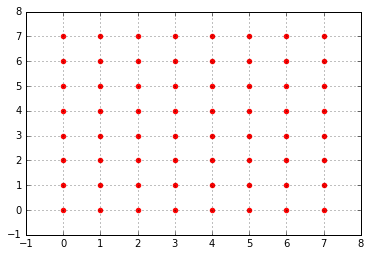

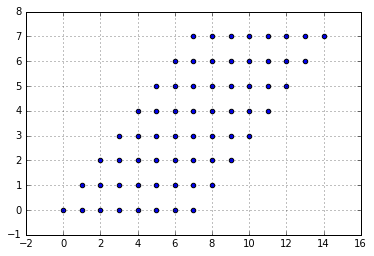

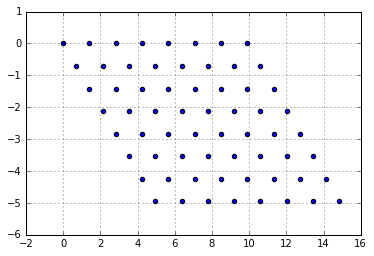

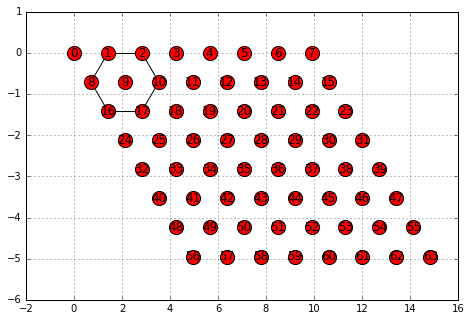

In [6]:
xx = np.arange(0,8,1)
yy = np.arange(0,8,1)
points = list(itertools.product(xx,yy))

plt.scatter(*zip(*points),color='red')   
plt.grid()
# plt.xlim([-15,15])
# plt.ylim([-15,15])
plt.show()

# shear the points
m = 1.

new_points = []
for i in range(0,len(points)):
    x = points[i][0] + m*points[i][1]
    y = points[i][1]
    new_points.append((x,y))

plt.scatter(*zip(*new_points))
plt.grid()
# plt.xlim([-15,15])
# plt.ylim([-15,15])
plt.show()    
    
# rotating the points    
points = new_points
new_points = []
theta = -np.pi/4.
for i in range(0,len(points)):
    x = np.cos(theta)*points[i][0] - np.sin(theta)*points[i][1]
    y = np.sin(theta)*points[i][0] + np.cos(theta)*points[i][1]
    new_points.append((x,y))
    
points = new_points

plt.scatter(*zip(*points))
plt.grid()
# plt.xlim([-15,15])
# plt.ylim([-15,15])
plt.show()

G = nx.Graph()
for i in range(0,len(points)):
    G.add_node(i,pos=points[i])
pos = nx.get_node_attributes(G,'pos')
col = nx.get_edge_attributes(G,'color')

G.add_path([1,2,10,17,16,8,1],beta=0,myosin=0,color='r')

nx.draw(G,pos, with_labels=True,node_size=200)
# plt.xlim(-2,2)
# plt.ylim(-2,2)
plt.axis("on")
plt.grid("on")

plt.show()

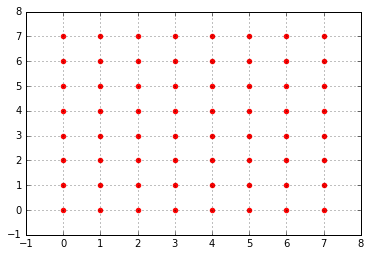

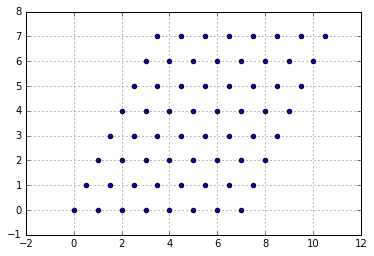

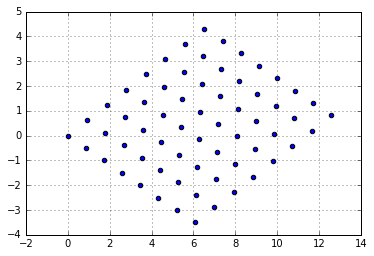

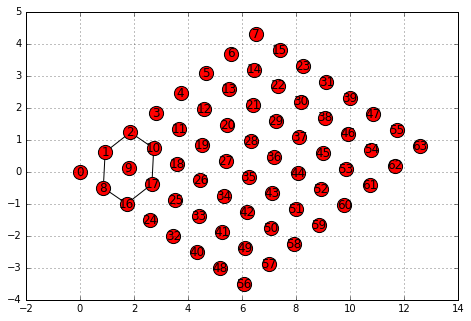

1.1180339887498947
1.118033988749895


In [56]:
xx = np.arange(0,8,1)
yy = np.arange(0,8,1)
points = list(itertools.product(xx,yy))

plt.scatter(*zip(*points),color='red')   
plt.grid()
# plt.xlim([-15,15])
# plt.ylim([-15,15])
plt.show()

# shear the points
m = 0.5

new_points = []
for i in range(0,len(points)):
    x = points[i][0] + m*points[i][1]
    y = points[i][1]
    new_points.append((x,y))

plt.scatter(*zip(*new_points))
plt.grid()
plt.show()    
    
# rotating the points    
points = new_points
new_points = []
theta = -np.pi/6.
for i in range(0,len(points)):
    x = np.cos(theta)*points[i][0] - np.sin(theta)*points[i][1]
    y = np.sin(theta)*points[i][0] + np.cos(theta)*points[i][1]
    new_points.append((x,y))
    
points = new_points

plt.scatter(*zip(*points))
plt.grid()
plt.show()

G = nx.Graph()
for i in range(0,len(points)):
    G.add_node(i,pos=points[i])
pos = nx.get_node_attributes(G,'pos')
col = nx.get_edge_attributes(G,'color')

G.add_path([1,2,10,17,16,8,1],beta=0,myosin=0,color='r')

nx.draw(G,pos, with_labels=True,node_size=200)
plt.axis("on")
plt.grid("on")

plt.show()
node_dict = nx.get_node_attributes(G,'pos')
print(distance.euclidean(node_dict[9],node_dict[10]))
print(distance.euclidean(node_dict[1],node_dict[2]))

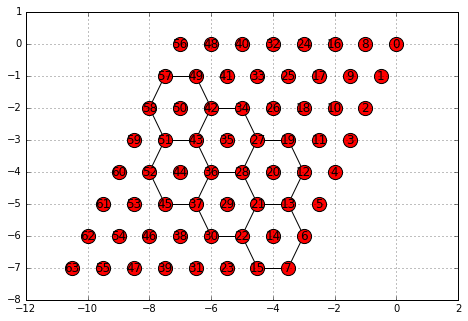

In [62]:
xx = np.arange(0,8,1)
yy = np.arange(0,8,1)
points = list(itertools.product(xx,yy))

# plt.scatter(*zip(*points),color='red')   
# plt.grid()
# plt.show()

# shear the points
m = 0.5

new_points = []
for i in range(0,len(points)):
    x = points[i][0] + m*points[i][1]
    y = points[i][1]
    new_points.append((x,y))

# plt.scatter(*zip(*new_points))
# plt.grid()
# plt.show()    
    
# rotating the points    
points = new_points
new_points = []
theta = -np.pi
for i in range(0,len(points)):
    x = np.cos(theta)*points[i][0] - np.sin(theta)*points[i][1]
    y = np.sin(theta)*points[i][0] + np.cos(theta)*points[i][1]
    new_points.append((x,y))
    
points = new_points

# plt.scatter(*zip(*points))
# plt.grid()
# plt.show()

G = nx.Graph()
for i in range(0,len(points)):
    G.add_node(i,pos=points[i])
pos = nx.get_node_attributes(G,'pos')
col = nx.get_edge_attributes(G,'color')

G.add_path([6,7,15,22,21,13,6])
G.add_path([22,30,37,36,28,21])
G.add_path([28,27,19,12,13])
G.add_path([36,43,42,34,27])
G.add_path([37,45,52,51,43])
G.add_path([51,58,57,49,42])

nx.draw(G,pos, with_labels=True,node_size=200)
plt.axis("on")
plt.grid("on")

plt.show()

In [63]:
node_dict = nx.get_node_attributes(G,'pos')

In [64]:
distance.euclidean(node_dict[14],node_dict[13])

1.1180339887498953

In [65]:
distance.euclidean(node_dict[34],node_dict[27])

1.118033988749895

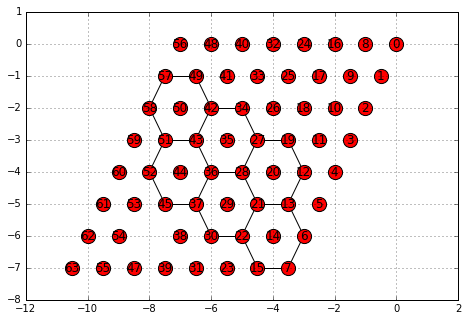

In [66]:
G.remove_node(46)
nx.draw(G,pos, with_labels=True,node_size=200)
plt.axis("on")
plt.grid("on")

plt.show()

The above cells demonstrate how to make my new tissue with networkx.  I go through a shear and rotate.

I hope to fill in the entire tissue as shown above.  Then delete the extra nodes.  Then renumber the nodes.

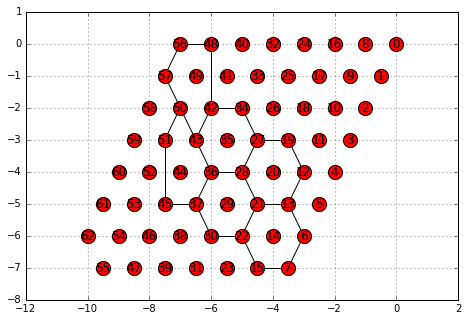

In [74]:
G = nx.convert_node_labels_to_integers(G,first_label=0)
nx.draw(G,pos, with_labels=True,node_size=200)
plt.axis("on")
plt.grid("on")

plt.show()

New plan:

Make a grid that contains more than enough points.  Take out the extra ones using remove_node.  Then renumber them.  Then finish with connecting them and seeding with the necessary values.